## Import Important Libraries ##

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior
tf.compat.v1.disable_eager_execution()
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
os.chdir('')
dataset = pd.read_csv('Social_Network_Ads.csv')

## Set up for K-Nearest Neighbors <u> Without</u> One Hot Encoding the Purchased Column ##

In [3]:
print(dataset.columns)
X = np.array(dataset[['Age', 'EstimatedSalary']])
y = np.array(dataset[['Purchased']])

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


### This is to set up the training and test set with a specific randomization ###

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 101)

### This is to standardize the training and testing data ###

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
k = 5
train_length = len(X_train[0])
test_length = len(X_test[0])

## Implementation <u> Without</u> One Hot Encoding  the Purchased Column ##

In [6]:
x_data_train = tf.placeholder(dtype=tf.float64, shape=[None, train_length])
y_data_train = tf.placeholder(dtype=tf.int32, shape=[None, len(y_train[0])])
x_data_test = tf.placeholder(dtype=tf.float64, shape=[None, test_length])

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis = 2)

_, top_k_index = tf.nn.top_k(tf.negative(distance), k = 5)
top_k_label = tf.gather(y_data_train, top_k_index)

sum_predictions = tf.reduce_sum(top_k_label, axis = 2)
prediction = tf.argmax(sum_predictions, axis = 1)
sess = tf.Session()
preds = sess.run(sum_predictions, feed_dict={x_data_train: X_train, x_data_test: X_test, y_data_train:y_train})
npreds = sess.run(prediction, feed_dict={x_data_train: X_train, x_data_test: X_test, y_data_train:y_train})

temp = 0
ans = []
for i in npreds:
    ans.append(preds[temp, i])
    temp += 1

# evaluation
accuracy = 0
for pred, actual in zip(ans, y_test):
    if pred == actual:
        accuracy += 1

print('The accuracy of the model: ')
print(accuracy / len(y_test))
print('\n')

c = classification_report(y_test, ans)

print(c)

The accuracy of the model: 
0.83


              precision    recall  f1-score   support

           0       0.98      0.75      0.85        65
           1       0.68      0.97      0.80        35

    accuracy                           0.83       100
   macro avg       0.83      0.86      0.83       100
weighted avg       0.88      0.83      0.83       100



## Set up for K-Nearest Neighbors <u> With</u> One Hot Encoding ##

In [7]:
print(dataset.columns)
X = np.array(dataset[['Age', 'EstimatedSalary']])
y = np.array(dataset['Purchased'])

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [8]:
y = np.eye(len(set(y)))[y]

### Spliting the data into Training and Test sets ###

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 101)

### Standardize the data again ###

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

k = 5
train_length = len(X_train[0])
test_length = len(X_test[0])

# Implementation <u> With</u> One Hot Encoding the Purchased Column #

In [11]:
x_data_train = tf.placeholder(dtype=tf.float64, shape=[None, train_length])
y_data_train = tf.placeholder(dtype=tf.int32, shape=[None, len(y_train[0])])
x_data_test = tf.placeholder(dtype=tf.float64, shape=[None, test_length])

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis = 2)

_, top_k_index = tf.nn.top_k(tf.negative(distance), k = 5)
top_k_label = tf.gather(y_data_train, top_k_index)

sum_predictions = tf.reduce_sum(top_k_label, axis = 1)
prediction = tf.argmax(sum_predictions, axis = 1)

sess1 = tf.Session()

npreds = sess1.run(prediction, feed_dict={x_data_train: X_train, x_data_test: X_test, y_data_train:y_train})

# evaluation
accuracy = 0
for pred, actual in zip(npreds, y_test):
    if pred == np.argmax(actual):
        accuracy += 1

print('The accuracy of the model: ')
print(accuracy/len(y_test))
print('\n')

y_test_not_encoded = np.argmax(y_test, axis = 1)

c = classification_report(y_test_not_encoded, npreds)

print(c)

The accuracy of the model: 
0.9


              precision    recall  f1-score   support

           0       0.97      0.88      0.92        65
           1       0.80      0.94      0.87        35

    accuracy                           0.90       100
   macro avg       0.89      0.91      0.89       100
weighted avg       0.91      0.90      0.90       100



# This is a K-Nearest Neighbors Solution <u> Without</u> Tensorflow implementation and added interactive graphs #

In [12]:
# K-Nearest Neighbors (K-NN)

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights='uniform')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

### Visualising the Training and Test set results using an interactive graph ###

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

xrange = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01)
yrange = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

y_probs = classifier.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 1]
y_probs = y_probs.reshape(X1.shape)

trace_specs = [
    [X_train, y_train, 0, 'Train', 'square'],
    [X_train, y_train, 1, 'Train', 'circle'],
    [X_test, y_test, 0, 'Test', 'square-dot'],
    [X_test, y_test, 1, 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=y_probs,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()

## Visualize Accuracy and Error Rates ##

In [14]:
accuracies = []
error_rate = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    tmp = classification_report(y_test, pred_i, output_dict=True)
    accuracy = tmp['accuracy']
    accuracies.append(accuracy)
    error_rate.append(np.mean(pred_i != y_test))
    
    if accuracy is max(accuracies):
        pred = knn.predict(X_test)
        print('WITH K='+str(i))
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

WITH K=1
[[54 11]
 [ 4 31]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        65
           1       0.74      0.89      0.81        35

    accuracy                           0.85       100
   macro avg       0.83      0.86      0.84       100
weighted avg       0.86      0.85      0.85       100

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
WITH K=2
[[59  6]
 [ 5 30]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        65
           1       0.83      0.86      0.85        35

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
WITH K=3
[[57  8]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        65
           1       0.81      0.97      0.88        35

    accuracy                      

### Accuracy Graph ###

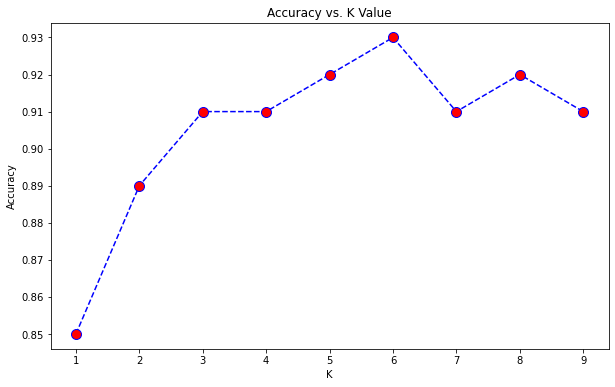

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### Error Rate Graph ###

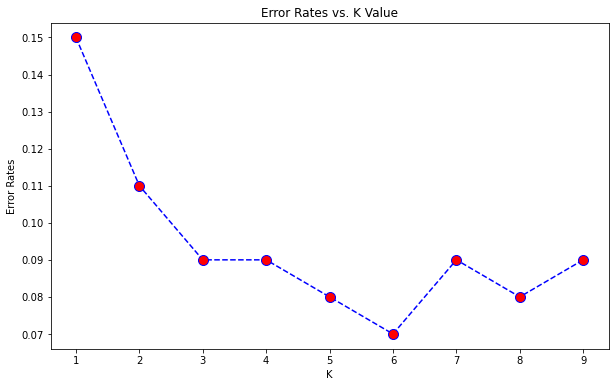

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rates vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rates')
plt.show()

### As shown above, the accuracy of the K Nearest Neighbor utilizing Tensorflow for a 5 neighbor model with One Hot Encoding is <u>90</u>%, the accuracy of the Tensorflow model without One Hot Encoding is  <u>83</u>% and the scikit-learn model is <u>92</u>% for 5 nearest neighbors and <u>93</u>% for 6 nearest neighbors. ###
### Another thing to consider is that, using a random state of 0 for both models, the scikit-learn model actually overfit the model, with a constant <u>95</u>% accuracy. So a random state of 101 was chosen.###
### The models also had different optimized number of nearest neighbors. The Scikit model performs best with 6 nearest neighbors. However, this also is a sign of overfitting, as the error rate increases after 6 nearest neighbors. ###